# <center>Challenge 0<center>

<p>Team Name: Circuit Breakers
<p>Student Names: Adriean Lemoine, Chris Smith

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# PART I

## Prepare Data

<b>A. Create a data set D with 100 data points with the following attributes (features) as such:</b><br>
seed = 0<br>
a1 is from a normal distribution N(mean=20,var=4)<br>
a2 is from a uniform distribution U(min=14,max=26)<br>

In [2]:
np.random.seed(0)
n = 100

# Create a1
a1_mean = 20
a1_var = 4
a1 = np.random.normal(loc=a1_mean, scale=np.sqrt(a1_var), size=n)

# Create a2
a2_min = 14
a2_max = 26
a2 = np.random.uniform(low=a2_min, high=a2_max, size=n)

# Create dataframe
D = pd.DataFrame({
    'a1': a1,
    'a2': a2
})

print(D)

           a1         a2
0   23.528105  19.086261
1   20.800314  21.276719
2   21.957476  14.230318
3   24.481786  17.618898
4   23.735116  21.922082
..        ...        ...
95  21.413146  23.972581
96  20.021000  21.547782
97  23.571741  24.471808
98  20.253824  17.282504
99  20.803979  23.576562

[100 rows x 2 columns]


x1 = 2*a1<br>
x2 = normal distribution N(mean=40,var=4)<br>
Pr(x1,x2,target) = {(x1, x2, 'P')}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,x1,20), shift in x1-dimension by 20 units towards right, data objects with class negative, where
Nr(x1,x2,target) = {(x1_shifted, x2, 'N')}<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>

In [3]:
def rotate(pts, degrees):
    """
    Rotate a given 2D point by a number of degrees with center of rotation at (0,0).
    pts = DataFrame with 2 attributes, representing x1 and x2
    degrees = Angle in the counter-clockwise direction.
    """
    radians = math.radians(degrees)
    R = []
    for x1, x2 in pts:
        rx1 = x1 * math.cos(radians) - x2 * math.sin(radians)
        rx2 = x1 * math.sin(radians) + x2 * math.cos(radians)
        R.append((rx1, rx2))
    #
    return R
#

def shift(pts, axis, shiftValue):
    """
    Shift a given 2D point by a set value on either axis.
    pts = DataFrame with 2 attributes, representing x1 and x2
    axis = Either x1 or x2
    shiftValue = Value to shift by on either axis
    """
    S = []
    # Shift on x1 axis
    if axis == 'x1':
        for x1, x2 in pts:
            sx1 = x1 + shiftValue
            S.append((sx1, x2))
        #
    elif axis == 'x2':
        for x1, x2 in pts:
            sx2 = x2 + shiftValue
            S.append((x1, sx2))
        #
    else:
        print('Invalid axis provided to function shift().')
        sys.exit()
    #
    return S
#

# Create x1
D['x1'] = 2 * D['a1']

# Create x2
x2_mean = 40
x2_var = 4
D['x2'] = np.random.normal(loc=x2_mean, scale=np.sqrt(x2_var), size=len(D))

# Create Pr
Pr = D[['x1', 'x2']].copy()
Pr['target'] = 'P'

# Create P
Pr_x = Pr[['x1', 'x2']].values
Pr_x_rotate = rotate(Pr_x, 45)
P = pd.DataFrame(Pr_x_rotate, columns=['x1', 'x2'])

# Create Nr
Pr_x_shift = shift(Pr_x, 'x1', 20)
Nr = pd.DataFrame(Pr_x_shift, columns=['x1', 'x2'])
Nr['target'] = 'N'

# Create N
Nr_x = Nr[['x1', 'x2']].values
Nr_x_rotate = rotate(Nr_x, 45)
N = pd.DataFrame(Nr_x_rotate, columns=['x1', 'x2'])

print('\nDataFrame P =========================')
print(P)
print('\nDataFrame Pr =========================')
print(Pr)
print('\nDataFrame D =========================')
print(D)
print('\nDataFrame Nr =========================')
print(Nr)
print('\nDataFrame N =========================')
print(N)


DataFrame P =========================
          x1         x2
0   6.452134  60.095396
1   0.167895  58.664278
2   3.904482  58.200639
3   7.313374  61.931575
4   5.926472  61.206574
..       ...        ...
95  1.860746  58.704778
96 -0.534638  57.162578
97  8.972243  57.698709
98 -2.407116  59.693582
99  0.585322  58.257215

[100 rows x 2 columns]

DataFrame Pr =========================
           x1         x2 target
0   47.056209  37.931514      P
1   41.600629  41.363189      P
2   43.914952  38.393181      P
3   48.963573  38.620900      P
4   47.470232  39.088935      P
..        ...        ...    ...
95  42.826293  40.194800      P
96  40.042000  40.798093      P
97  47.143482  34.454814      P
98  40.507648  43.911825      P
99  41.607957  40.780187      P

[100 rows x 3 columns]

DataFrame D =========================
           a1         a2         x1         x2
0   23.528105  19.086261  47.056209  37.931514
1   20.800314  21.276719  41.600629  41.363189
2   21.957476  14.230

### Merge Data

Merge Pr and Nr into a single set PNr. 

In [4]:
PNr = pd.concat([Pr, Nr], ignore_index=True)

print(PNr)

            x1         x2 target
0    47.056209  37.931514      P
1    41.600629  41.363189      P
2    43.914952  38.393181      P
3    48.963573  38.620900      P
4    47.470232  39.088935      P
..         ...        ...    ...
195  62.826293  40.194800      N
196  60.042000  40.798093      N
197  67.143482  34.454814      N
198  60.507648  43.911825      N
199  61.607957  40.780187      N

[200 rows x 3 columns]


# PART II

## Visualize Data
The axis scale should be the same. The class-P and -N data points will in red-circle and blue-triangle, respectively.

Plot Pr and P in the same figure on a separate sub-plots of 1 by 2:

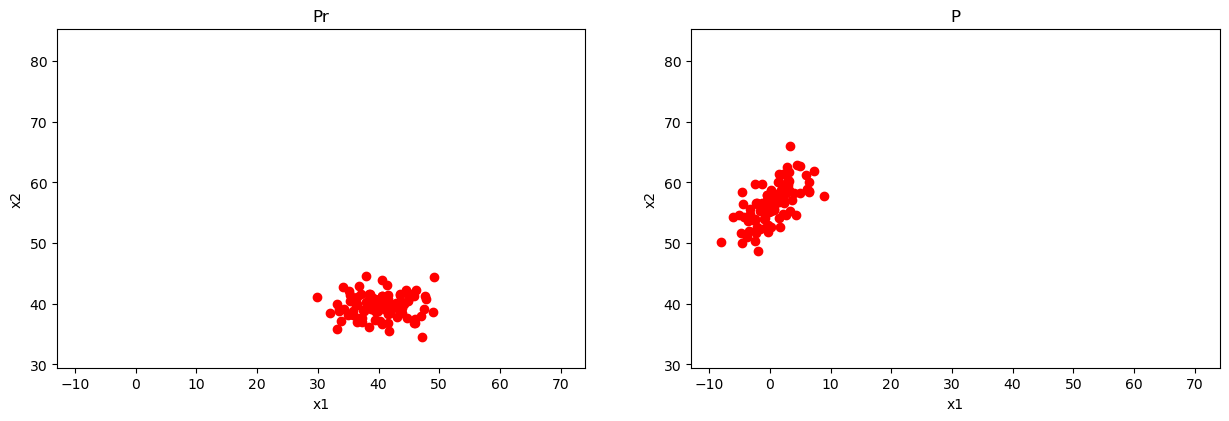

In [5]:
dfs = [P, Pr, N, Nr]

x_min, x_max = np.min([df['x1'].min() for df in dfs]) - 5, np.max([df['x1'].max() for df in dfs]) + 5
y_min, y_max = np.min([df['x2'].min() for df in dfs]) - 5, np.max([df['x2'].max() for df in dfs]) + 5

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

scatter_plot_params = {
    'xlabel': 'x1',
    'ylabel': 'x2',
    'xlim': (x_min, x_max),
    'ylim': (y_min, y_max),
    'aspect': 'equal'
}

for ax, (df, title) in zip(axs, [(Pr, 'Pr'), (P, 'P')]):
    ax.scatter(df['x1'], df['x2'], c='r', marker='o',label=title)
    ax.set_title(title)
    ax.set(**scatter_plot_params)

plt.show()

Plot Nr and N in the same figure on a separate sub-plots of 1 by 2:

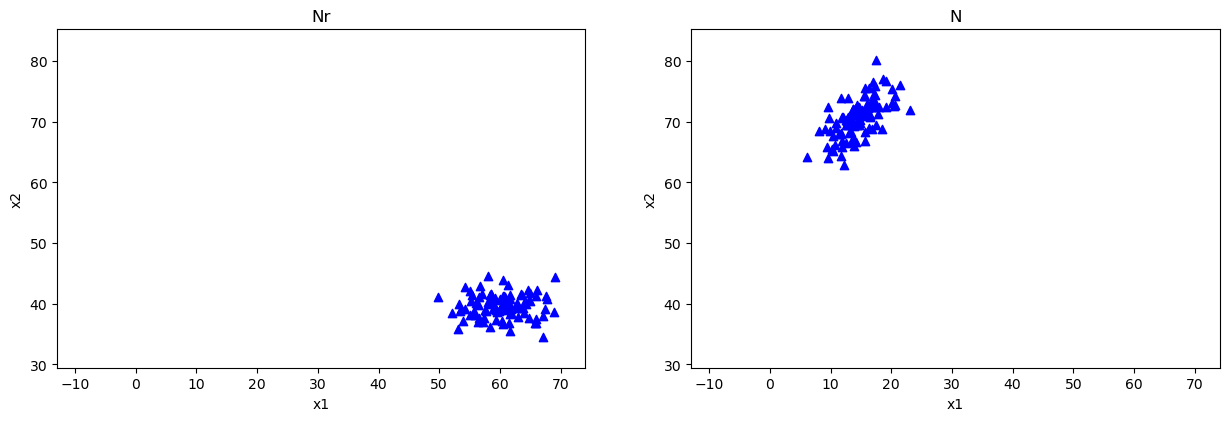

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for ax, (df, title) in zip(axs, [(Nr, 'Nr'), (N, 'N')]):
    ax.scatter(df['x1'], df['x2'], c='b', marker='^',label=title)
    ax.set_title(title)
    ax.set(**scatter_plot_params)

plt.show()

Plot {PNr}:

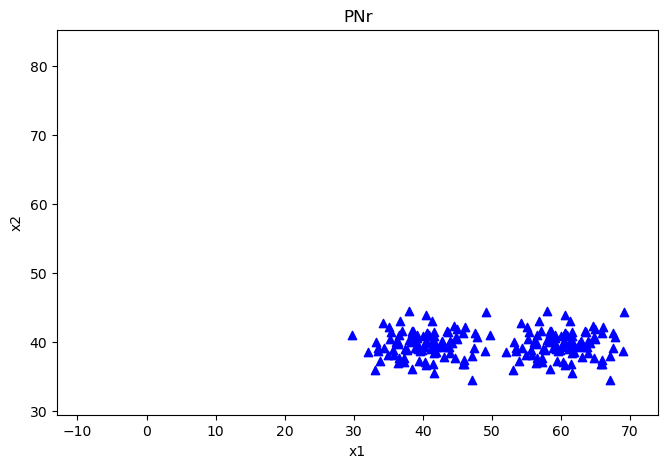

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

for ax, (df, title) in zip([axs], [(PNr, 'PNr')]):
    ax.scatter(df['x1'], df['x2'], c='b', marker='^', label=title)
    ax.set_title(title)
    ax.set(**scatter_plot_params)

plt.show()

# PART III

## Simple Classifier

Classifier SimpleClassifier:
Given data D(x1, x2),<br>
If x1 + x2 > median, then predicted class<br>
...    <b>N</b><br>
Else<br>
...    <b>P</b>

Obtain predicted class labels using SimpleClassifier:

In [8]:
PNr['sum'] = PNr['x1'] + PNr['x2']
threshold = PNr['sum'].median()

PNr_predicted_classifier = np.where(PNr['sum'] > threshold, 'N', 'P')
PNr['Predicted_Classifier'] = PNr_predicted_classifier

print(PNr[['x1', 'x2', 'Predicted_Classifier']])

            x1         x2 Predicted_Classifier
0    47.056209  37.931514                    P
1    41.600629  41.363189                    P
2    43.914952  38.393181                    P
3    48.963573  38.620900                    P
4    47.470232  39.088935                    P
..         ...        ...                  ...
195  62.826293  40.194800                    N
196  60.042000  40.798093                    N
197  67.143482  34.454814                    N
198  60.507648  43.911825                    N
199  61.607957  40.780187                    N

[200 rows x 3 columns]


Print output Y(x1,x2,True_Target, Predicted_Target)

In [9]:
print("PNr(x1, x2, True_Target, Predicted_Target)")

for i in range(len(PNr)):
    x1 = PNr.loc[i, 'x1']
    x2 = PNr.loc[i, 'x2']
    true_target = PNr.loc[i, 'target']
    predicted_target = PNr.loc[i, 'Predicted_Classifier']

    print("PNr({}, {}, {}, {})".format(x1, x2, true_target, predicted_target))


PNr(x1, x2, True_Target, Predicted_Target)
PNr(47.05620938387066, 37.93151431643107, P, P)
PNr(41.600628833468896, 41.363189036563256, P, P)
PNr(43.91495193642296, 38.39318067165232, P, P)
PNr(48.963572796805835, 38.6209004444996, P, P)
PNr(47.47023196059987, 39.088934992965314, P, P)
PNr(36.09088848049436, 40.034958318050116, P, P)
PNr(43.80035367010236, 39.292012177493035, P, P)
PNr(39.39457116680921, 37.250097413163964, P, P)
PNr(39.58712459282577, 38.71276319433422, P, P)
PNr(41.64239400775349, 35.553193695551144, P, P)
PNr(40.576174284643514, 41.25046290205437, P, P)
PNr(45.8170940278519, 36.79588468878651, P, P)
PNr(43.04415090058797, 37.791233321143096, P, P)
PNr(40.48670006597131, 40.10433015852195, P, P)
PNr(41.7754529309817, 38.52087400721737, P, P)
PNr(41.334697309497066, 43.08602919081347, P, P)
PNr(45.97631629263042, 37.414286180553106, P, P)
PNr(39.179366944936795, 40.53410173869837, P, P)
PNr(41.252270806603605, 39.92143436354501, P, P)
PNr(36.5836170427931, 37.663813004

Plot output Y. Use the same marker shape. Predicted Target colors: P in Red and N in blue.

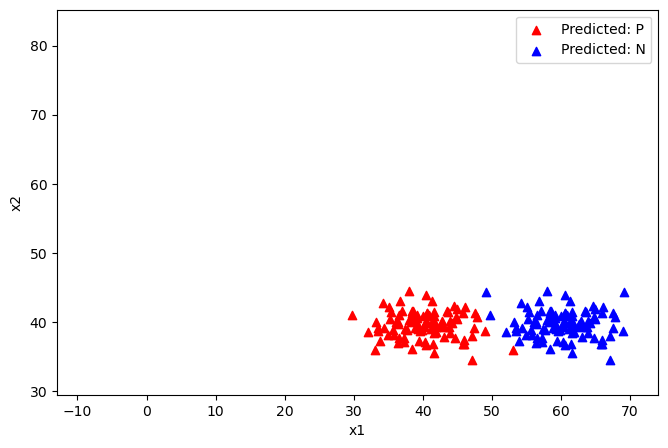

In [10]:
plt.figure(figsize=(15, 5))

for i in range(len(PNr)):
    x1 = PNr.loc[i, 'x1']
    x2 = PNr.loc[i, 'x2']
    predicted_target = PNr.loc[i, 'Predicted_Classifier']

    color = 'red' if predicted_target == 'P' else 'blue'
    plt.scatter(x1, x2, color=color, marker='^')

plt.xlabel(scatter_plot_params['xlabel'])
plt.ylabel(scatter_plot_params['ylabel'])
plt.xlim(scatter_plot_params['xlim'])
plt.ylim(scatter_plot_params['ylim'])
plt.gca().set_aspect(scatter_plot_params['aspect'])

plt.scatter([], [], color='red', marker='^', label='Predicted: P')
plt.scatter([], [], color='blue', marker='^', label='Predicted: N')
plt.legend()

plt.show()

Obtain the Confusion Matrix and print:

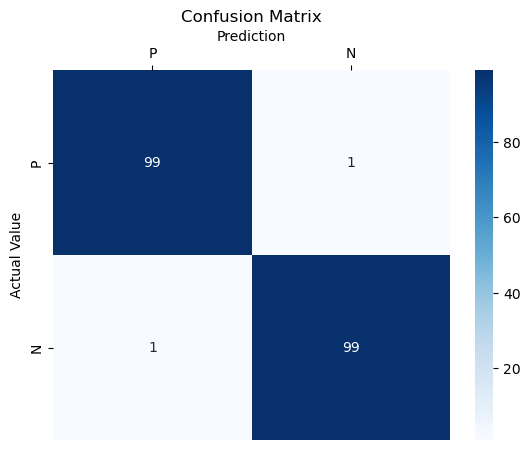

In [11]:
actual_value = PNr['target']
prediction = PNr['Predicted_Classifier']

cm = confusion_matrix(actual_value, prediction, labels=['P', 'N'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['P', 'N'], yticklabels=['P', 'N'])
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.show()


Claculate the Performance Scores of Accuracy, Recall (Sensitivity), Specificity, F1-score. Plot as bar-chart:

Accuracy: 0.9900
Recall (Sensitivity): 0.9900
Specificity: 0.9900
F1-score: 0.9900


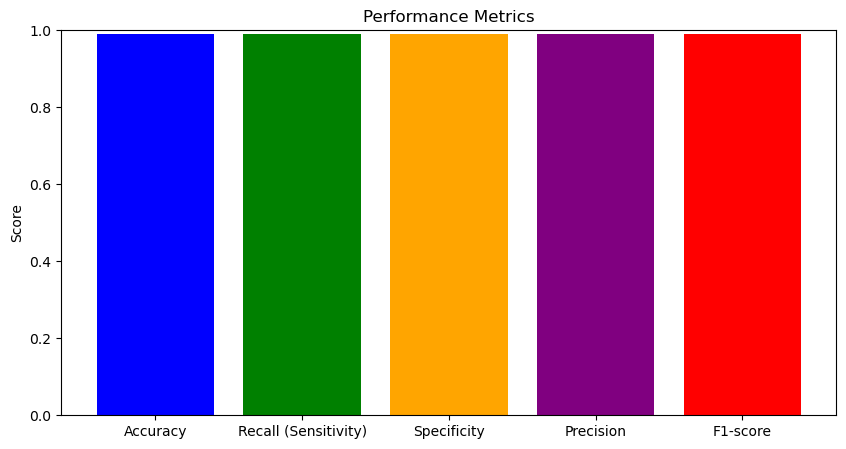

In [12]:
TP = cm[0, 0] 
FP = cm[0, 1]  
FN = cm[1, 0]  
TN = cm[1, 1] 

accuracy = (TP + TN) / (TP + TN + FP + FN)

recall = TP / (TP + FN) if TP + FN != 0 else 0

specificity = TN / (TN + FP) if TN + FP != 0 else 0

precision = TP / (TP + FP) if TP + FP != 0 else 0

f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1:.4f}")

metrics = ['Accuracy', 'Recall (Sensitivity)', 'Specificity', 'Precision', 'F1-score']
values = [accuracy, recall, specificity, precision, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

references: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

https://www.w3schools.com/python/ref_func_zip.asp

https://docs.python.org/3.3/library/functions.html#zip

https://www.w3schools.com/python/python_ml_confusion_matrix.asp

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/

https://keylabs.ai/blog/how-to-use-a-confusion-matrix-for-model-evaluation/